## Ocean Surface metrics: Long-term Changes

In this notebook, we examine long-term changes (over 10-year period) in the overturning strength in the subpolar North Atlantic. Correspondingly, changes in SST, surface heat flux and sea surface height are analysed at high latitudes.

We focus on winter season (DJF) and simulation started on 1 Nov 2008 (or 1 Nov 2010). The approach is then extended to all simulations (see relevant python script).

In [1]:
# Load libraries

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Read Data and combine cell area var to xarray dataset 

In [37]:
# Read ensemble data for run started in year 2008

year = 2008;
#year = 2010;

ppdir="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/Data_Consolidated/"

var_list = ['hfds', 'mlotst', 'tos', 'sos', 'zos']

ds = []

for var in var_list:

    d = xr.open_dataset(ppdir + str(year) + "_" + var + ".nc") 
    ds.append(d)

ds = xr.merge(ds)

ds_psi = xr.open_dataset(ppdir + str(year) + "_diaptr.nc") 

ds_area = xr.open_dataset(ppdir + "Area.nc")
ds_area = ds_area.get(['area_t'])
ds_area = ds_area.rename({'x':'i', 'y':'j'})

ds = xr.merge([ds, ds_area])

ds['time'] = ds['time'].astype("datetime64[ns]")

print(ds, ds_psi)

<xarray.Dataset>
Dimensions:    (bnds: 2, i: 450, j: 450, r: 10, time: 125)
Coordinates:
  * i          (i) int64 749 750 751 752 753 754 ... 1194 1195 1196 1197 1198
  * j          (j) int64 699 700 701 702 703 704 ... 1144 1145 1146 1147 1148
    latitude   (j, i) float32 3.9967546 3.9967546 3.9967546 ... 73.3409 73.23673
    longitude  (j, i) float32 -99.75 -99.5 -99.25 ... 51.24366 51.40632
  * time       (time) datetime64[ns] 2008-11-16 2008-12-16 ... 2019-03-16
    nav_lat    (j, i) float32 ...
    nav_lon    (j, i) float32 ...
Dimensions without coordinates: bnds, r
Data variables:
    time_bnds  (r, time, bnds) float64 5.718e+04 5.721e+04 ... 6.093e+04
    hfds       (r, time, j, i) float32 ...
    mlotst     (r, time, j, i) float32 ...
    tos        (r, time, j, i) float32 ...
    sos        (r, time, j, i) float32 ...
    zos        (r, time, j, i) float32 ...
    area_t     (j, i) float32 ... <xarray.Dataset>
Dimensions:                  (axis_nbounds: 2, deptht: 75, depthw

In [3]:
ds.hfds

<xarray.DataArray 'hfds' (r: 10, time: 125, j: 450, i: 450)>
[253125000 values with dtype=float32]
Coordinates:
  * i          (i) int64 749 750 751 752 753 754 ... 1194 1195 1196 1197 1198
  * j          (j) int64 699 700 701 702 703 704 ... 1144 1145 1146 1147 1148
    latitude   (j, i) float32 3.9967546 3.9967546 3.9967546 ... 73.3409 73.23673
    longitude  (j, i) float32 -99.75 -99.5 -99.25 ... 51.24366 51.40632
  * time       (time) datetime64[ns] 2008-11-16 2008-12-16 ... 2019-03-16
    nav_lat    (j, i) float32 ...
    nav_lon    (j, i) float32 ...
Dimensions without coordinates: r
Attributes:
    standard_name:  surface_downward_heat_flux_in_sea_water
    long_name:      Downward Heat Flux at Sea Water Surface
    comment:        This is the net flux of heat entering the liquid water co...
    units:          W m-2
    original_name:  mo: (variable_name: hfds)
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello

### Compute Seasonal Mean and Anomalies (Focus on DJF)

In [12]:
# compute climatology
hfds_clim = (ds['hfds'].mean('r')).groupby('time.season').mean('time')
sst_clim = (ds['tos'].mean('r')).groupby('time.season').mean('time')
ssh_clim = (ds['zos'].mean('r')).groupby('time.season').mean('time')
mlotst_clim = (ds['mlotst'].mean('r')).groupby('time.season').mean('time')

# compute anomaly and isolate winter seasons only
hfds_resam = ds['hfds'].resample(time='QS-DEC').mean('time')
hfds_anom = hfds_resam.groupby("time.season") - hfds_clim
hfds_anom = hfds_anom.sel(time = hfds_anom['time.season'] == 'DJF')

sst_resam = ds['tos'].resample(time='QS-DEC').mean('time')
sst_anom = sst_resam.groupby("time.season") - sst_clim
sst_anom = sst_anom.sel(time = sst_anom['time.season'] == 'DJF')

ssh_resam = ds['zos'].resample(time='QS-DEC').mean('time')
ssh_anom = ssh_resam.groupby("time.season") - ssh_clim
ssh_anom = ssh_anom.sel(time = ssh_anom['time.season'] == 'DJF')

mlotst_resam = ds['mlotst'].resample(time='QS-DEC').mean('time')
mlotst_anom = mlotst_resam.groupby("time.season") - mlotst_clim
mlotst_anom = mlotst_anom.sel(time = mlotst_anom['time.season'] == 'DJF')

/opt/jaspy/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/jaspy/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/jaspy/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/jaspy/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [35]:
psi_max = ds_psi.zomsfatl.mean(['x']).max(dim='depthw')
psi_max = psi_max.assign_coords(y=ds_psi.nav_lat.isel(x=0), time_counter=ds_psi.time)

# compute climatology of overturning
psi_clim = (psi_max).groupby('time_counter.season').mean('time_counter')

# compute anomaly and isolate winter seasons only
psi_resam = psi_max.resample(time_counter='QS-DEC').mean('time_counter')
psi_anom = psi_resam.groupby("time_counter.season") - psi_clim
psi_anom = psi_anom.sel(time_counter = psi_anom['time_counter.season'] == 'DJF')

# Heat and Salt Transport anomalies
heat_psi = ds_psi['hfovovrt_atlantic'].mean('x').assign_coords(y=ds_psi.nav_lat.isel(x=0), time_counter=ds_psi.time)
heat_psi_clim = heat_psi.groupby('time_counter.season').mean('time_counter')
heat_psi_resam = heat_psi.resample(time_counter='QS-DEC').mean('time_counter')
heat_psi_anom = heat_psi_resam.groupby("time_counter.season") - heat_psi_clim
heat_psi_anom = heat_psi_anom.sel(time_counter = heat_psi_anom['time_counter.season'] == 'DJF')

heat_gyre = ds_psi['hfovgyre_atlantic'].mean('x').assign_coords(y=ds_psi.nav_lat.isel(x=0), time_counter=ds_psi.time)
heat_gyre_clim = heat_gyre.groupby('time_counter.season').mean('time_counter')
heat_gyre_resam = heat_gyre.resample(time_counter='QS-DEC').mean('time_counter')
heat_gyre_anom = heat_gyre_resam.groupby("time_counter.season") - heat_gyre_clim
heat_gyre_anom = heat_gyre_anom.sel(time_counter = heat_gyre_anom['time_counter.season'] == 'DJF')


salt_psi = ds_psi['sltovovrt_atlantic'].mean('x').assign_coords(y=ds_psi.nav_lat.isel(x=0), time_counter=ds_psi.time)
salt_psi_clim = salt_psi.groupby('time_counter.season').mean('time_counter')
salt_psi_resam = salt_psi.resample(time_counter='QS-DEC').mean('time_counter')
salt_psi_anom = salt_psi_resam.groupby("time_counter.season") - salt_psi_clim
salt_psi_anom = salt_psi_anom.sel(time_counter = salt_psi_anom['time_counter.season'] == 'DJF')

salt_gyre = ds_psi['sltovgyre_atlantic'].mean('x').assign_coords(y=ds_psi.nav_lat.isel(x=0), time_counter=ds_psi.time)
salt_gyre_clim = salt_gyre.groupby('time_counter.season').mean('time_counter')
salt_gyre_resam = salt_gyre.resample(time_counter='QS-DEC').mean('time_counter')
salt_gyre_anom = salt_gyre_resam.groupby("time_counter.season") - salt_gyre_clim
salt_gyre_anom = salt_gyre_anom.sel(time_counter = salt_gyre_anom['time_counter.season'] == 'DJF')

In [5]:
print(psi_anom)

<xarray.DataArray 'zomsfatl' (r: 10, time_counter: 11, y: 451)>
array([[[ 9.530779,  9.687431, ..., -0.332709, -0.319859],
        [ 0.184317,  0.230047, ...,  0.391828,  0.42003 ],
        ...,
        [-2.521099, -2.458529, ..., -0.537767, -0.550268],
        [-2.703648, -2.546013, ..., -0.261046, -0.23363 ]],

       [[ 6.007376,  6.119862, ...,  1.077027,  1.080274],
        [ 3.195797,  3.102499, ..., -0.286211, -0.310174],
        ...,
        [-3.116009, -3.14024 , ..., -0.065023, -0.069898],
        [-0.798368, -0.798864, ..., -0.691487, -0.674819]],

       ...,

       [[ 6.16851 ,  6.178835, ..., -1.126699, -1.135772],
        [ 2.416979,  2.177319, ..., -0.767861, -0.791249],
        ...,
        [-4.009872, -3.784513, ..., -1.11031 , -1.103081],
        [-5.931775, -5.947676, ...,  0.014454,  0.023129]],

       [[ 7.000879,  7.180408, ..., -0.664496, -0.679767],
        [-0.363243, -0.657282, ..., -1.494217, -1.498484],
        ...,
        [-0.964506, -0.984806, ..., -0.

In [6]:
print(hfds_anom)

<xarray.DataArray 'hfds' (r: 10, time: 11, j: 450, i: 450)>
array([[[[   9.603134, ...,         nan],
         ...,
         [        nan, ..., -108.0452  ]],

        ...,

        [[  -1.212223, ...,         nan],
         ...,
         [        nan, ...,  -53.89276 ]]],


       ...,


       [[[  -2.144127, ...,         nan],
         ...,
         [        nan, ...,  -61.089447]],

        ...,

        [[  -3.79929 , ...,         nan],
         ...,
         [        nan, ...,   68.625015]]]], dtype=float32)
Coordinates:
  * i          (i) int64 749 750 751 752 753 754 ... 1194 1195 1196 1197 1198
  * j          (j) int64 699 700 701 702 703 704 ... 1144 1145 1146 1147 1148
    latitude   (j, i) float32 3.9967546 3.9967546 3.9967546 ... 73.3409 73.23673
    longitude  (j, i) float32 -99.75 -99.5 -99.25 ... 51.24366 51.40632
    nav_lon    (j, i) float32 -99.75 -99.5 -99.25 ... 51.24366 51.40632
    nav_lat    (j, i) float32 3.9967546 3.9967546 3.9967546 ... 73.3409 73.23673
  * t

In [4]:
def plot_sec(ax, da, vmin=-999, vmax=999, vstep=1, lat_lon_ext = [-180, 180, -85., 85.],
             lon='geolon', lat='geolat', cmap='RdBu_r', title='what is it?'):
    
    contours = np.arange(vmin, vmax+vstep, vstep)
    
    p = da.plot(ax=ax, x=lon, y=lat, vmin=vmin, vmax=vmax, cmap=cmap, 
                transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False)
    
    # add separate colorbar
    cb = plt.colorbar(p, ax=ax, extend='both', shrink=0.6) # orientation="horizontal"
    cb.ax.tick_params(labelsize=12)
    
    ax.set_extent(lat_lon_ext, crs=ccrs.PlateCarree())
    
    # parallels/meridiens
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    #gl.ylocator = mticker.FixedLocator([-80, -70, -60, -50, -40, -30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12, 'color': 'black'}
    gl.ylabel_style = {'size': 12, 'color': 'black'}
    
    #ax.set_adjustable('datalim')
    #ax.coastlines()
    ax.add_feature(cfeature.LAND) #facecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.set_aspect(1.0)

    #p.axes.gridlines(color='black', alpha=0.5, linestyle='--')
    
    _ = plt.title(title, fontsize=14)
    return fig

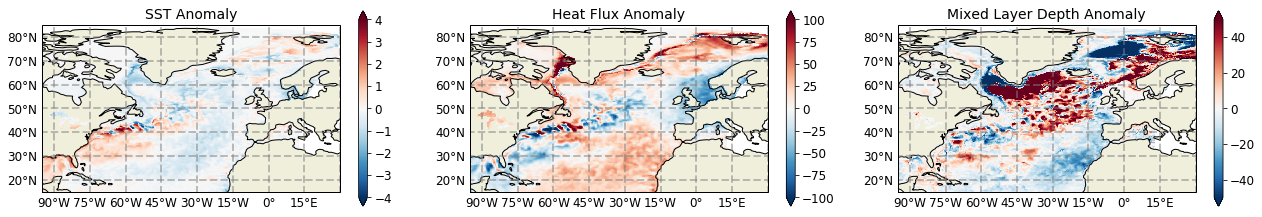

In [14]:
lat_lon_ext = [-95., 30., 15., 85.]
grid1 = plt.GridSpec(1, 3, wspace=0.15, hspace=0.3)
fig = plt.figure(figsize=[22,6])

ax = fig.add_subplot(grid1[0, 0], projection=ccrs.PlateCarree(),facecolor='grey')
tmp = sst_anom.isel(r=4, time=6) #.assign_coords({'lat': ds['latitude'], 'lon': ds['longitude']})
_ = plot_sec(ax, tmp, vmin=-4., vmax=4., vstep=2.e-3, lat_lon_ext = lat_lon_ext,
                   lon='longitude', lat='latitude', cmap='RdBu_r', title=r'SST Anomaly')

ax = fig.add_subplot(grid1[0, 1], projection=ccrs.PlateCarree(),facecolor='grey')
tmp = hfds_anom.isel(r=4, time=6) #.assign_coords({'lat': ds['latitude'], 'lon': ds['longitude']})
_ = plot_sec(ax, tmp, vmin=-100., vmax=100., vstep=2.e-3, lat_lon_ext = lat_lon_ext,
                   lon='longitude', lat='latitude', cmap='RdBu_r', title=r'Heat Flux Anomaly')

ax = fig.add_subplot(grid1[0, 2], projection=ccrs.PlateCarree(),facecolor='grey')
tmp = mlotst_anom.isel(r=4, time=6) #.assign_coords({'lat': ds['latitude'], 'lon': ds['longitude']})
_ = plot_sec(ax, tmp, vmin=-50., vmax=50., vstep=2.e-3, lat_lon_ext = lat_lon_ext,
                   lon='longitude', lat='latitude', cmap='RdBu_r', title=r'Mixed Layer Depth Anomaly')

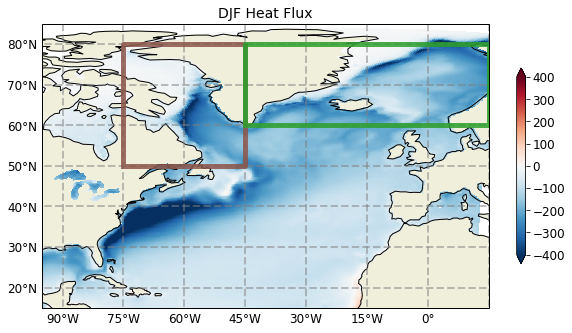

In [28]:
lat_lon_ext = [-95., 15., 15., 85.]
grid1 = plt.GridSpec(1, 1, wspace=0.15, hspace=0.3)
fig = plt.figure(figsize=[10,6])
    
ax = fig.add_subplot(grid1[0, 0], projection=ccrs.PlateCarree(),facecolor='grey')

tmp = hfds_clim.sel(season = 'DJF') #.assign_coords({'lat': ds['latitude'], 'lon': ds['longitude']})
p = plot_sec(ax, tmp, vmin=-400., vmax=400., vstep=2.e-3, lat_lon_ext = lat_lon_ext,
                   lon='longitude', lat='latitude', cmap='RdBu_r', title=r'DJF Heat Flux')

# Add Labrador Sea Box
lab_y = [50., 50., 80., 80., 50.]
lab_x = [-75., -45., -45., -75., -75.]
ax.plot(lab_x,lab_y, linestyle='-', lw = 5, color = 'tab:brown', alpha = 0.85, transform=ccrs.PlateCarree())

# Add GreenLand Sea Box
lab_y = [60., 60., 80., 80., 60.]
lab_x = [-45., 15., 15., -45., -45.]
ax.plot(lab_x,lab_y, linestyle='-', lw = 5, color = 'tab:green', alpha = 0.85, transform=ccrs.PlateCarree())


Text(0.5, 1.0, 'Heat Flux (JJA - DJF)')

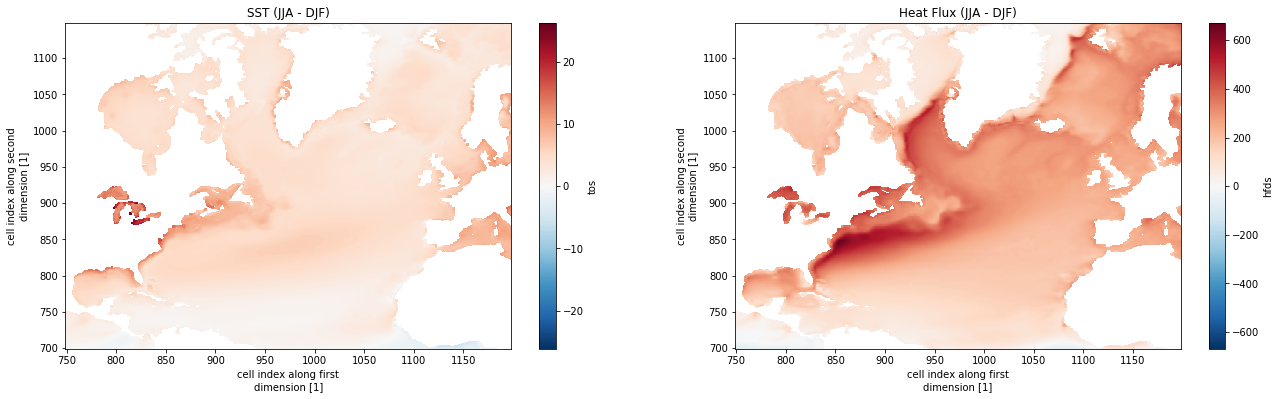

In [15]:
fig = plt.figure(figsize=[22,6])

plt.subplot(1,2,1)
(sst_clim.sel(season = 'JJA') - sst_clim.sel(season = 'DJF')).plot()
plt.title('SST (JJA - DJF)')

plt.subplot(1,2,2)
(hfds_clim.sel(season = 'JJA') - hfds_clim.sel(season = 'DJF')).plot()
plt.title('Heat Flux (JJA - DJF)')

### Correlating Anomalies in Overturning, Heat Flux, SST 

We examine changes in overturning, heat, SST, heat flux over 10 years. We mainly focus on subpolar region (-50E to -20E and 50 N - 60 N), but include changes in overturning strength 30 N - 60 N for the sake completeness. For heat flux and SST, we consider two regions - labrador sea and greenland sea, as these regions can have distinct effects.  

1. There seems to be some correlation between $\psi$ and surface heat flux in Labrador sea.
2. No clear relationship between $\psi$ and SST.



In [38]:
# Compute area-weighted means using spatial fields


# Labrador Sea
lat_lim = [50.0, 80.0]; lon_lim = [-75.0, -45.0]

dA = ds['area_t'].where((ds.latitude >= lat_lim[0]) & (ds.latitude <= lat_lim[1]) &
                    (ds.longitude >= lon_lim[0]) & (ds.longitude <= lon_lim[1]))

tmp = sst_anom.where((ds.latitude >= lat_lim[0]) & (ds.latitude <= lat_lim[1]) &
                    (ds.longitude >= lon_lim[0]) & (ds.longitude <= lon_lim[1]))
sst_anom_labrador = (tmp * dA).sum(['i','j']) / dA.sum(['i','j'])

tmp = ssh_anom.where((ds.latitude >= lat_lim[0]) & (ds.latitude <= lat_lim[1]) &
                    (ds.longitude >= lon_lim[0]) & (ds.longitude <= lon_lim[1]))
ssh_anom_labrador = (tmp * dA).sum(['i','j']) / dA.sum(['i','j'])

tmp = hfds_anom.where((ds.latitude >= lat_lim[0]) & (ds.latitude <= lat_lim[1]) &
                    (ds.longitude >= lon_lim[0]) & (ds.longitude <= lon_lim[1]))
hfds_anom_labrador = (tmp * dA).sum(['i','j']) / dA.sum(['i','j'])

# GreenLand Sea
lat_lim = [60.0, 80.0]; lon_lim = [-45.0, 15.0]

dA = ds['area_t'].where((ds.latitude >= lat_lim[0]) & (ds.latitude <= lat_lim[1]) &
                    (ds.longitude >= lon_lim[0]) & (ds.longitude <= lon_lim[1]))

tmp = sst_anom.where((ds.latitude >= lat_lim[0]) & (ds.latitude <= lat_lim[1]) &
                    (ds.longitude >= lon_lim[0]) & (ds.longitude <= lon_lim[1]))
sst_anom_greenland = (tmp * dA).sum(['i','j']) / dA.sum(['i','j'])

tmp = ssh_anom.where((ds.latitude >= lat_lim[0]) & (ds.latitude <= lat_lim[1]) &
                    (ds.longitude >= lon_lim[0]) & (ds.longitude <= lon_lim[1]))
ssh_anom_greenland = (tmp * dA).sum(['i','j']) / dA.sum(['i','j'])

tmp = hfds_anom.where((ds.latitude >= lat_lim[0]) & (ds.latitude <= lat_lim[1]) &
                    (ds.longitude >= lon_lim[0]) & (ds.longitude <= lon_lim[1]))
hfds_anom_greenland = (tmp * dA).sum(['i','j']) / dA.sum(['i','j'])

# psi at 60N, 50N, 40N, 30N
psi_anom_mean = psi_anom.sel(y=[30., 40., 50., 60.], method="nearest")

#psi_anom_mean = psi_anom.sel(y = slice(lat_lim[0], lat_lim[1])).mean('y')

In [39]:
print(hfds_anom_labrador, psi_anom_mean)

<xarray.DataArray (r: 10, time: 11)>
array([[ 6.799344e+00, -7.914039e+00,  1.279096e+00, -8.565158e+00,
         1.338721e+01, -2.458547e+01,  5.349323e+00,  4.809685e+00,
         1.630213e+00,  7.556194e+00,  2.847559e+00],
       [-1.376782e+01,  9.015610e-01, -1.964306e-02, -4.080150e+00,
         1.138233e+01,  6.865617e+00, -1.907569e+01, -9.078769e+00,
        -1.683339e+01,  2.292988e+01,  9.737062e+00],
       [ 1.111897e+01,  1.086214e+01,  1.786875e+01, -1.596485e+00,
        -1.856151e+01, -2.170191e+00, -2.186107e+01,  4.664679e+00,
        -1.212878e+01, -1.235614e+01, -8.599212e+00],
       [-2.029976e+01,  1.223634e+00, -2.154065e+01, -1.257027e+01,
        -7.811818e+00,  4.343797e+00,  1.595910e+01,  9.245398e+00,
        -3.567089e+01, -7.622424e+00, -1.293914e+01],
       [ 9.387477e+00,  2.627847e+01, -2.151703e+01,  1.751385e+00,
         3.932154e+00, -1.214163e+01,  1.079801e+01,  6.846379e+00,
        -1.005673e+01,  1.561070e+00,  2.089158e+01],
       [ 6.10

(array([-4., -2.,  0.,  2.,  4.,  6.]), <a list of 6 Text xticklabel objects>)

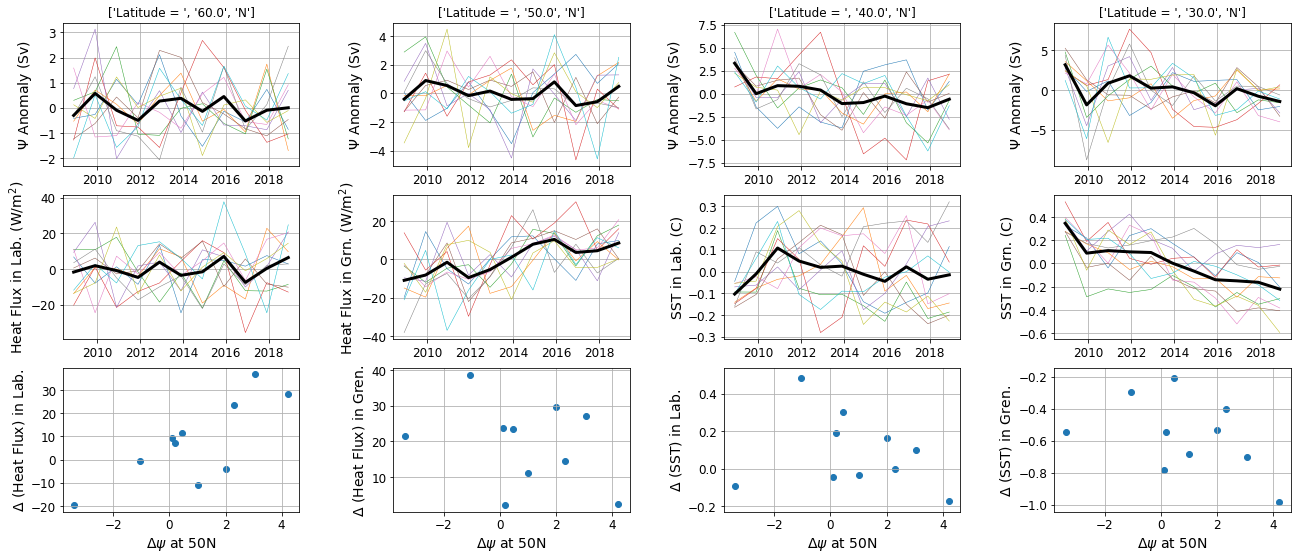

In [41]:
# for simulation stated in Nov 2008

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.2)
fig = plt.figure(figsize=[22,9])

for i in range (0,4):
    ax = fig.add_subplot(grid[0, i])
    ax.plot(psi_anom_mean['time_counter'], psi_anom_mean.isel(y=3-i).transpose('time_counter', 'r'), lw = 0.5)
    ax.plot(psi_anom_mean['time_counter'], psi_anom_mean.isel(y=3-i).mean(['r']), lw = 3.0, color='k')    
    ax.set_ylabel(r'$\Psi$ Anomaly (Sv)', fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.title(['Latitude = ', str(round(psi_anom_mean.y.values[3-i])),'N'])


ax = fig.add_subplot(grid[1, 0])
ax.plot(hfds_anom_labrador['time'], hfds_anom_labrador.transpose('time', 'r'), lw = 0.5)
ax.plot(hfds_anom_labrador['time'], hfds_anom_labrador.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'Heat Flux in Lab. (W/m$^2$)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 1])
ax.plot(hfds_anom_greenland['time'], hfds_anom_greenland.transpose('time', 'r'), lw = 0.5)
ax.plot(hfds_anom_greenland['time'], hfds_anom_greenland.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'Heat Flux in Grn. (W/m$^2$)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 2])
ax.plot(sst_anom_labrador['time'], sst_anom_labrador.transpose('time', 'r'), lw = 0.5)
ax.plot(sst_anom_labrador['time'], sst_anom_labrador.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'SST in Lab. (C)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 3])
ax.plot(sst_anom_greenland['time'], sst_anom_greenland.transpose('time', 'r'), lw = 0.5)
ax.plot(sst_anom_greenland['time'], sst_anom_greenland.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'SST in Grn. (C)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)


d_psi =  psi_anom_mean.isel(y=2, time_counter=10) - psi_anom_mean.isel(y=2, time_counter=0)
d_hfds_lab = hfds_anom_labrador.isel(time=10) - hfds_anom_labrador.isel(time=0)
d_hfds_gren = hfds_anom_greenland.isel(time=10) - hfds_anom_greenland.isel(time=0)
d_sst_lab = sst_anom_labrador.isel(time=10) - sst_anom_labrador.isel(time=0)
d_sst_gren = sst_anom_greenland.isel(time=10) - sst_anom_greenland.isel(time=0)

ax = fig.add_subplot(grid[2, 0])
ax.scatter(d_psi, d_hfds_lab)
ax.set_ylabel(r'$\Delta$ (Heat Flux) in Lab.', fontsize=14)
ax.set_xlabel(r'$\Delta\psi$ at 50N', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[2, 1])
ax.scatter(d_psi, d_hfds_gren)
ax.set_ylabel(r'$\Delta$ (Heat Flux) in Gren.', fontsize=14)
ax.set_xlabel(r'$\Delta\psi$ at 50N', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[2, 2])
ax.scatter(d_psi, d_sst_lab)
ax.set_ylabel(r'$\Delta$ (SST) in Lab.', fontsize=14)
ax.set_xlabel(r'$\Delta\psi$ at 50N', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[2, 3])
ax.scatter(d_psi, d_sst_gren)
ax.set_ylabel(r'$\Delta$ (SST) in Gren.', fontsize=14)
ax.set_xlabel(r'$\Delta\psi$ at 50N', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

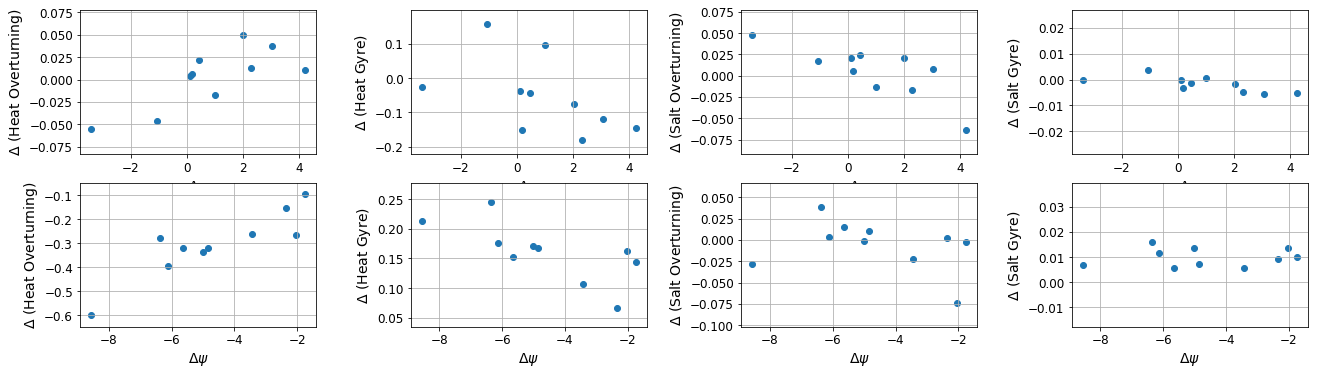

In [118]:
psi_anom_mean = psi_anom.sel(y=[30., 50.], method="nearest")
heat_psi_anom_mean = heat_psi_anom.sel(y=[30., 50.], method="nearest")
heat_gyre_anom_mean = heat_gyre_anom.sel(y=[30., 50.], method="nearest")
salt_psi_anom_mean = salt_psi_anom.sel(y=[30., 50.], method="nearest")
salt_gyre_anom_mean = salt_gyre_anom.sel(y=[30., 50.], method="nearest")

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.2)
fig = plt.figure(figsize=[22,9])


for i in range(0,2):
    
    d_psi =  psi_anom_mean.isel(y=1-i, time_counter=10) - psi_anom_mean.isel(y=1-i, time_counter=0)
    
    ax = fig.add_subplot(grid[1+i, 0])
    ax.scatter(d_psi, heat_psi_anom_mean.isel(y=1-i, time_counter=10) - heat_psi_anom_mean.isel(y=1-i, time_counter=0))
    ax.set_ylabel(r'$\Delta$ (Heat Overturning)', fontsize=14)
    ax.set_xlabel(r'$\Delta\psi$', fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
    ax = fig.add_subplot(grid[1+i, 1])
    ax.scatter(d_psi, heat_gyre_anom_mean.isel(y=1-i, time_counter=10) - heat_gyre_anom_mean.isel(y=1-i, time_counter=0))
    ax.set_ylabel(r'$\Delta$ (Heat Gyre)', fontsize=14)
    ax.set_xlabel(r'$\Delta\psi$', fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
    ax = fig.add_subplot(grid[1+i, 2])
    ax.scatter(d_psi, salt_psi_anom_mean.isel(y=1-i, time_counter=10) - salt_psi_anom_mean.isel(y=1-i, time_counter=0))
    ax.set_ylabel(r'$\Delta$ (Salt Overturning)', fontsize=14)
    ax.set_xlabel(r'$\Delta\psi$', fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
    ax = fig.add_subplot(grid[1+i, 3])
    ax.scatter(d_psi, salt_gyre_anom_mean.isel(y=1-i, time_counter=10) - salt_gyre_anom_mean.isel(y=1-i, time_counter=0))
    ax.set_ylabel(r'$\Delta$ (Salt Gyre)', fontsize=14)
    ax.set_xlabel(r'$\Delta\psi$', fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)

(array([733042., 733773., 734503., 735234., 735964., 736695., 737425.]),
 <a list of 7 Text xticklabel objects>)

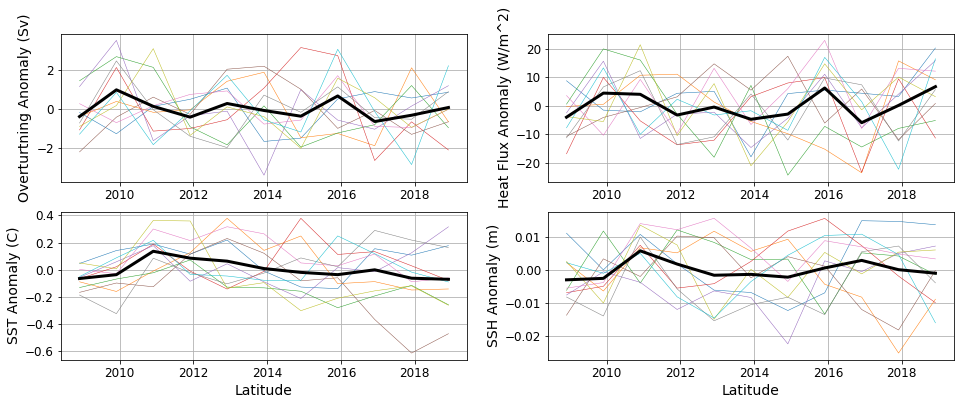

In [111]:
# for simulation stated in Nov 2008

grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[16,6])

ax = fig.add_subplot(grid[0, 0])
ax.plot(psi_anom_mean['time_counter'], psi_anom_mean.transpose('time_counter', 'r'), lw = 0.5)
ax.plot(psi_anom_mean['time_counter'], psi_anom_mean.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'Overturtning Anomaly (Sv)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[0, 1])
ax.plot(hfds_anom_mean['time'], hfds_anom_mean.transpose('time', 'r'), lw = 0.5)
ax.plot(hfds_anom_mean['time'], hfds_anom_mean.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'Heat Flux Anomaly (W/m^2)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 0])
ax.plot(sst_anom_mean['time'], sst_anom_mean.transpose('time', 'r'), lw = 0.5)
ax.plot(sst_anom_mean['time'], sst_anom_mean.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'SST Anomaly (C)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 1])
ax.plot(ssh_anom_mean['time'], ssh_anom_mean.transpose('time', 'r'), lw = 0.5)
ax.plot(ssh_anom_mean['time'], ssh_anom_mean.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'SSH Anomaly (m)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

Text(0.5, 0, '$\\Delta\\psi$')

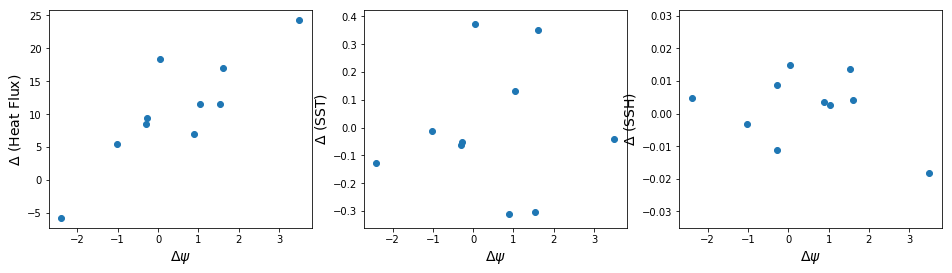

In [118]:
# for simulation stated in Nov 2008

grid = plt.GridSpec(1, 3, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[16,4])

d_psi =  psi_anom_mean.isel(time_counter=10) - psi_anom_mean.isel(time_counter=0)
d_hfds = hfds_anom_mean.isel(time=10) - hfds_anom_mean.isel(time=0)
d_sst = sst_anom_mean.isel(time=10) - sst_anom_mean.isel(time=0)
d_ssh = ssh_anom_mean.isel(time=10) - ssh_anom_mean.isel(time=0)

ax = fig.add_subplot(grid[0, 0])
ax.scatter(d_psi, d_hfds)
ax.set_ylabel(r'$\Delta$ (Heat Flux)', fontsize=14)
ax.set_xlabel(r'$\Delta\psi$', fontsize=14)

ax = fig.add_subplot(grid[0, 1])
ax.scatter(d_psi, d_sst)
ax.set_ylabel(r'$\Delta$ (SST)', fontsize=14)
ax.set_xlabel(r'$\Delta\psi$', fontsize=14)

ax = fig.add_subplot(grid[0, 2])
ax.scatter(d_psi, d_ssh)
ax.set_ylabel(r'$\Delta$ (SSH)', fontsize=14)
ax.set_xlabel(r'$\Delta\psi$', fontsize=14)

(array([733773., 734503., 735234., 735964., 736695., 737425., 738156.]),
 <a list of 7 Text xticklabel objects>)

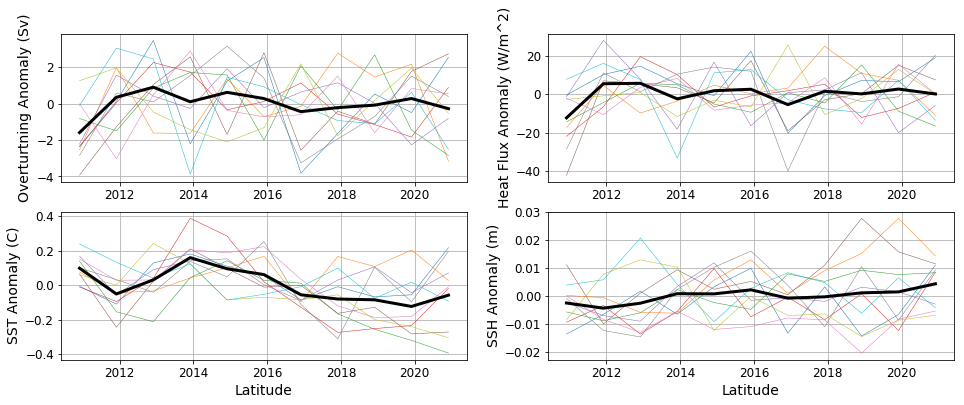

In [11]:
# for simulation stated in Nov 2010

grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[16,6])

ax = fig.add_subplot(grid[0, 0])
ax.plot(psi_anom_mean['time_counter'], psi_anom_mean.transpose('time_counter', 'r'), lw = 0.5)
ax.plot(psi_anom_mean['time_counter'], psi_anom_mean.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'Overturtning Anomaly (Sv)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[0, 1])
ax.plot(hfds_anom_mean['time'], hfds_anom_mean.transpose('time', 'r'), lw = 0.5)
ax.plot(hfds_anom_mean['time'], hfds_anom_mean.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'Heat Flux Anomaly (W/m^2)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 0])
ax.plot(sst_anom_mean['time'], sst_anom_mean.transpose('time', 'r'), lw = 0.5)
ax.plot(sst_anom_mean['time'], sst_anom_mean.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'SST Anomaly (C)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 1])
ax.plot(ssh_anom_mean['time'], ssh_anom_mean.transpose('time', 'r'), lw = 0.5)
ax.plot(ssh_anom_mean['time'], ssh_anom_mean.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'SSH Anomaly (m)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

In [87]:
lat_lim = [50.0, 60.0]; lon_lim = [-50.0, -10.0]
tmp = sst_anom.where((ds.latitude >= lat_lim[0]) & (ds.latitude <= lat_lim[1]) &
                    (ds.longitude >= lon_lim[0]) & (ds.longitude <= lon_lim[1]))

dA = ds['area_t'].where((ds.latitude >= lat_lim[0]) & (ds.latitude <= lat_lim[1]) &
                    (ds.longitude >= lon_lim[0]) & (ds.longitude <= lon_lim[1]))

## Atmospheric Data

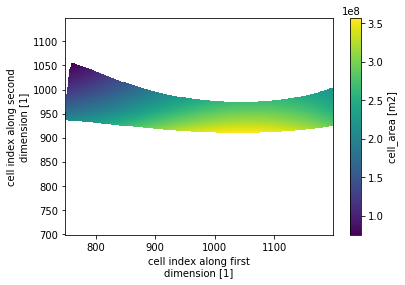

In [115]:
#tmp.isel(r=0, time=0).plot()
dA.plot()
plt.contour(sst_anom.isel(r=0, time=0))

## Atmospheric Data Read

In [43]:
# Read ensemble data for run started in year 2008

year = 2008;
#year = 2010;

ppdir="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/Data_Consolidated/"

#'tauu', 'tauv'
var_list = var_list = ['tauu', 'tauv', 'psl', 'sfcWind', 'tas', 'pr', 'evspsbl', 'clt', 'ua', 'va']

ds = []

for var in var_list:
 
    d = xr.open_dataset(ppdir + str(year) + "_" + var + ".nc") 
    d = d.drop(['lat_bnds', 'lon_bnds'])
    
    if (var == 'ua' or var == 'va'):
        d = d.rename({'lat':'lat_q', 'lon':'lon_q'})
    elif (var == 'tauv'):
        d = d.rename({'lat':'lat_q'})
    elif (var == 'tauu'):
        d = d.rename({'lon':'lon_q'}) 
        
    if (var == 'sfcWind' or var == 'tas'):
        d = d.drop('height')
        
    ds.append(d)

ds = xr.merge(ds)

ds_psi = xr.open_dataset(ppdir + str(year) + "_diaptr.nc") 

ds['time'] = ds['time'].astype("datetime64[ns]")

print(ds, ds_psi)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lat_q: 144, lon: 120, lon_q: 120, r: 10, time: 125)
Coordinates:
  * lat        (lat) float64 0.2778 0.8333 1.389 1.944 ... 78.61 79.17 79.72
  * lon_q      (lon_q) float64 260.0 260.8 261.7 262.5 ... 357.5 358.3 359.2
  * time       (time) datetime64[ns] 2008-11-16 2008-12-16 ... 2019-03-16
  * lat_q      (lat_q) float64 7.629e-06 0.5556 1.111 ... 78.33 78.89 79.44
  * lon        (lon) float64 260.4 261.2 262.1 262.9 ... 357.1 357.9 358.7 359.6
    plev       float64 8.5e+04
Dimensions without coordinates: bnds, r
Data variables:
    time_bnds  (r, time, bnds) float64 5.718e+04 5.721e+04 ... 6.093e+04
    tauu       (r, time, lat, lon_q) float32 ...
    tauv       (r, time, lat_q, lon) float32 ...
    psl        (r, time, lat, lon) float32 ...
    sfcWind    (r, time, lat, lon) float32 ...
    tas        (r, time, lat, lon) float32 ...
    pr         (r, time, lat, lon) float32 ...
    evspsbl    (r, time, lat, lon) float32 ...
    c

In [44]:
# Deltas to compute cell areas

RAD_EARTH = 6.387e6

ds['dx'] = np.mean(ds['lon'].diff('lon')) * np.cos(ds['lat'] * np.pi / 180.) * (2 * np.pi * RAD_EARTH / 360.)

ds['dx_q'] = np.mean(ds['lon_q'].diff('lon_q')) * np.cos(ds['lat_q'] * np.pi / 180.) * (2 * np.pi * RAD_EARTH / 360.)

ds['dy'] = np.mean(ds['lat'].diff('lat')) * (2 * np.pi * RAD_EARTH / 360.)

#print(dy)

In [45]:
print(ds)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lat_q: 144, lon: 120, lon_q: 120, r: 10, time: 125)
Coordinates:
  * lat        (lat) float64 0.2778 0.8333 1.389 1.944 ... 78.61 79.17 79.72
  * lon_q      (lon_q) float64 260.0 260.8 261.7 262.5 ... 357.5 358.3 359.2
  * time       (time) datetime64[ns] 2008-11-16 2008-12-16 ... 2019-03-16
  * lat_q      (lat_q) float64 7.629e-06 0.5556 1.111 ... 78.33 78.89 79.44
  * lon        (lon) float64 260.4 261.2 262.1 262.9 ... 357.1 357.9 358.7 359.6
    plev       float64 8.5e+04
Dimensions without coordinates: bnds, r
Data variables:
    time_bnds  (r, time, bnds) float64 5.718e+04 5.721e+04 ... 6.093e+04
    tauu       (r, time, lat, lon_q) float32 ...
    tauv       (r, time, lat_q, lon) float32 ...
    psl        (r, time, lat, lon) float32 ...
    sfcWind    (r, time, lat, lon) float32 ...
    tas        (r, time, lat, lon) float32 ...
    pr         (r, time, lat, lon) float32 ...
    evspsbl    (r, time, lat, lon) float32 ...
    c

### Compute Jet Indices (wind max and corresponding latitude)

Following Woolings et al. (2010) and Ma et al. (2020), we compute max wind and latitude at 850 hpa. At  first, monthlly zonal-mean wind is computed by averagining along latitude between $60^{\circ}W - 0^{\circ}$ and $15^{\circ}W - 75^{\circ}N$ . Then, we identify the max wind speed and corresponding latitude for all months for each ensemble member.

In [32]:
u = ds['ua'].sel(lon_q=slice(300., 360.), lat_q = slice(15., 75.)).mean('lon_q')

idx = u.argmax('lat_q')

u_max = u.max('lat_q')
lat_umax = u.lat_q[idx] #u.idxmax('lat_q') 

Text(0.5, 0, 'Occurence')

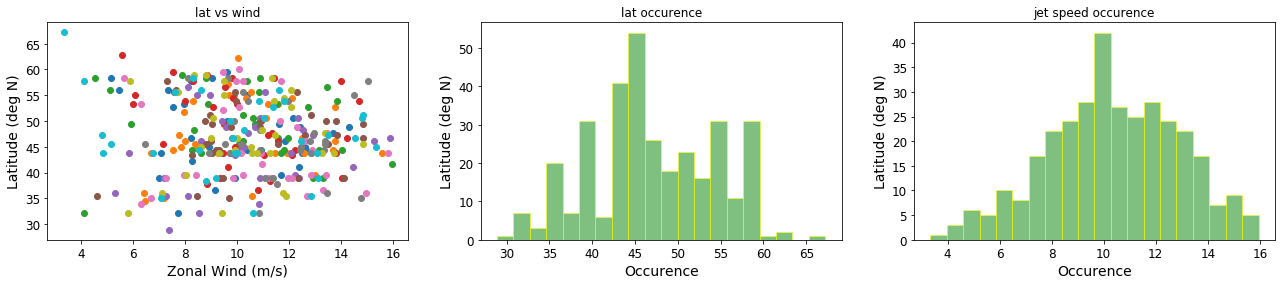

In [89]:
# Wihtout removing climatology

grid = plt.GridSpec(1, 3, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[22,4])

ax = fig.add_subplot(grid[0, 0])

for i in range(0,10):    
    ax.plot(u_max.isel(r=i).sel(time = u_max['time.season'] == 'DJF'), lat_umax.isel(r=i).sel(time = u_max['time.season'] == 'DJF'),'o') 
    
plt.title('lat vs wind')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
ax.set_ylabel('Latitude (deg N)', fontsize=14)
ax.set_xlabel('Zonal Wind (m/s)', fontsize=14)
    
ax = fig.add_subplot(grid[0, 1])
ax.hist(lat_umax.sel(time = u_max['time.season'] == 'DJF').values.flatten(), 20, lw=1, ec="yellow", fc="green", alpha=0.5);
plt.title('lat occurence')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
ax.set_ylabel('Latitude (deg N)', fontsize=14)
ax.set_xlabel('Occurence', fontsize=14)

ax = fig.add_subplot(grid[0, 2])
ax.hist(u_max.sel(time = u_max['time.season'] == 'DJF').values.flatten(), 20, lw=1, ec="yellow", fc="green", alpha=0.5);
plt.title('jet speed occurence')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
ax.set_ylabel('Latitude (deg N)', fontsize=14)
ax.set_xlabel('Occurence', fontsize=14)

Text(0.5, 0, 'Occurence')

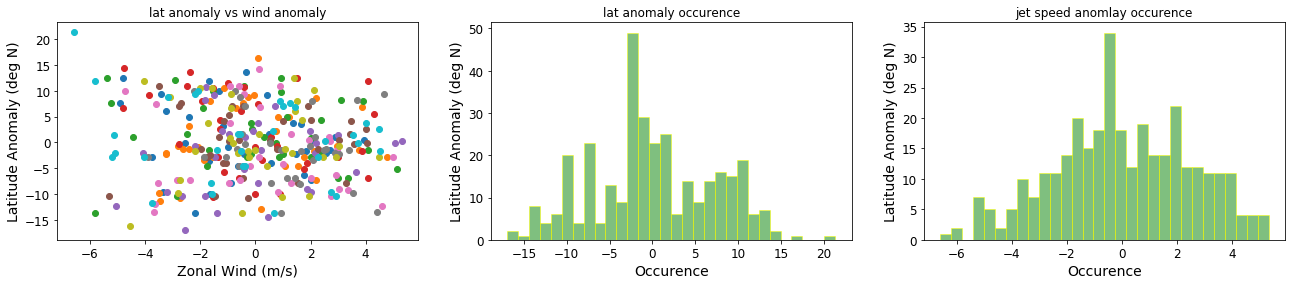

In [90]:
# After removing monthlly climatology

umax_clim = (u_max.mean('r')).groupby('time.month').mean('time')
lat_max_clim = (lat_umax.mean('r')).groupby('time.month').mean('time')

umax_resam = u_max.resample(time='MS').mean('time')
umax_anom = umax_resam.groupby("time.month") - umax_clim

lat_max_resam = lat_umax.resample(time='MS').mean('time')
lat_max_anom = lat_max_resam.groupby("time.month") - lat_max_clim

grid = plt.GridSpec(1, 3, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[22,4])

ax = fig.add_subplot(grid[0, 0])

for i in range(0,10):    
    ax.plot(umax_anom.isel(r=i).sel(time = umax_anom['time.season'] == 'DJF'), lat_max_anom.isel(r=i).sel(time = u_max['time.season'] == 'DJF'),'o') 
    
plt.title('lat anomaly vs wind anomaly')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
ax.set_ylabel('Latitude Anomaly (deg N)', fontsize=14)
ax.set_xlabel('Zonal Wind (m/s)', fontsize=14)
    
ax = fig.add_subplot(grid[0, 1])
ax.hist(lat_max_anom.sel(time = umax_anom['time.season'] == 'DJF').values.flatten(), 30, lw=1, ec="yellow", fc="green", alpha=0.5);
plt.title('lat anomaly occurence')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
ax.set_ylabel('Latitude Anomaly (deg N)', fontsize=14)
ax.set_xlabel('Occurence', fontsize=14)

ax = fig.add_subplot(grid[0, 2])
ax.hist(umax_anom.sel(time = umax_anom['time.season'] == 'DJF').values.flatten(), 30, lw=1, ec="yellow", fc="green", alpha=0.5);
plt.title('jet speed anomlay occurence')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
ax.set_ylabel('Latitude Anomaly (deg N)', fontsize=14)
ax.set_xlabel('Occurence', fontsize=14)

In [96]:
umax_anom['time.season']

<xarray.DataArray 'season' (time: 43)>
array(['SON', 'DJF', 'MAM', 'JJA', 'SON', 'DJF', 'MAM', 'JJA', 'SON', 'DJF',
       'MAM', 'JJA', 'SON', 'DJF', 'MAM', 'JJA', 'SON', 'DJF', 'MAM', 'JJA',
       'SON', 'DJF', 'MAM', 'JJA', 'SON', 'DJF', 'MAM', 'JJA', 'SON', 'DJF',
       'MAM', 'JJA', 'SON', 'DJF', 'MAM', 'JJA', 'SON', 'DJF', 'MAM', 'JJA',
       'SON', 'DJF', 'MAM'], dtype='<U3')
Coordinates:
    plev     float64 8.5e+04
  * time     (time) datetime64[ns] 2008-09-01 2008-12-01 ... 2019-03-01
    season   (time) <U3 'SON' 'DJF' 'MAM' 'JJA' ... 'JJA' 'SON' 'DJF' 'MAM'

Text(0.5, 0, 'Occurence')

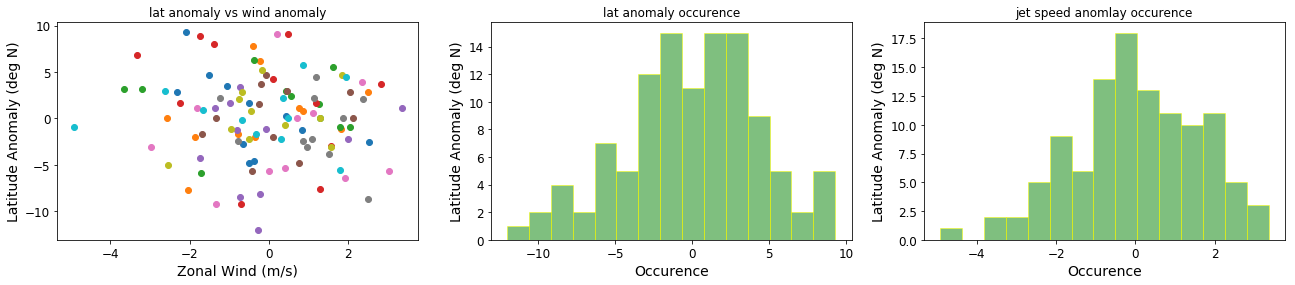

In [101]:
# After removing seasonal climatology

umax_clim = (u_max.mean('r')).groupby('time.season').mean('time')
lat_max_clim = (lat_umax.mean('r')).groupby('time.season').mean('time')

umax_resam = u_max.resample(time='QS-DEC').mean('time')
umax_anom = umax_resam.groupby("time.season") - umax_clim

lat_max_resam = lat_umax.resample(time='QS-DEC').mean('time')
lat_max_anom = lat_max_resam.groupby("time.season") - lat_max_clim

grid = plt.GridSpec(1, 3, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[22,4])

ax = fig.add_subplot(grid[0, 0])

for i in range(0,10):    
    ax.plot(umax_anom.isel(r=i).sel(time = umax_anom['time.season'] == 'DJF'), lat_max_anom.isel(r=i).sel(time = umax_anom['time.season'] == 'DJF'),'o') 
    
plt.title('lat anomaly vs wind anomaly')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
ax.set_ylabel('Latitude Anomaly (deg N)', fontsize=14)
ax.set_xlabel('Zonal Wind (m/s)', fontsize=14)
    
ax = fig.add_subplot(grid[0, 1])
ax.hist(lat_max_anom.sel(time = umax_anom['time.season'] == 'DJF').values.flatten(), 15, lw=1, ec="yellow", fc="green", alpha=0.5);
plt.title('lat anomaly occurence')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
ax.set_ylabel('Latitude Anomaly (deg N)', fontsize=14)
ax.set_xlabel('Occurence', fontsize=14)

ax = fig.add_subplot(grid[0, 2])
ax.hist(umax_anom.sel(time = umax_anom['time.season'] == 'DJF').values.flatten(), 15, lw=1, ec="yellow", fc="green", alpha=0.5);
plt.title('jet speed anomlay occurence')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
ax.set_ylabel('Latitude Anomaly (deg N)', fontsize=14)
ax.set_xlabel('Occurence', fontsize=14)

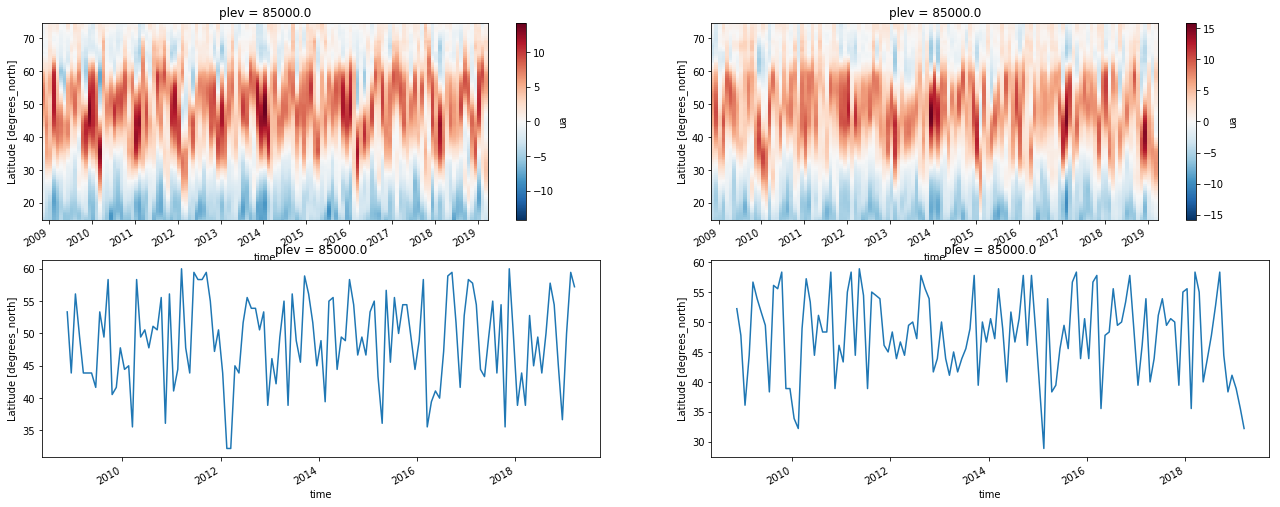

In [15]:
fig = plt.figure(figsize=[22,8])

plt.subplot(2,2,1)
u.isel(r=0).transpose().plot()

plt.subplot(2,2,3)
lat_umax.isel(r=0).plot()

plt.subplot(2,2,2)
u.isel(r=4).transpose().plot()

plt.subplot(2,2,4)
lat_umax.isel(r=4).plot()

(array([733042., 733773., 734503., 735234., 735964., 736695., 737425.]),
 <a list of 7 Text xticklabel objects>)

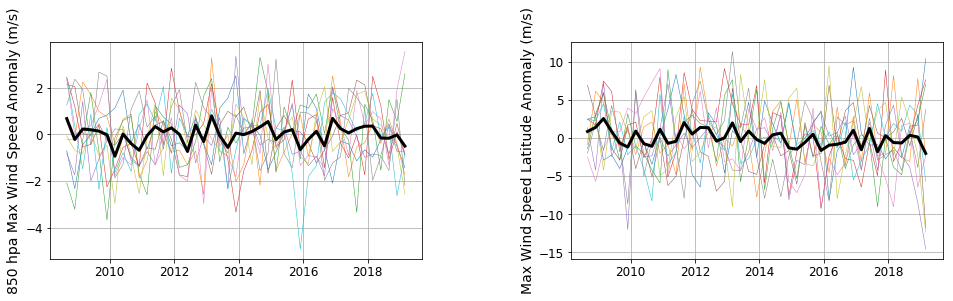

In [47]:
# Time series of jet lat and jet speed 

umax_clim = (u_max.mean('r')).groupby('time.season').mean('time')
lat_max_clim = (lat_umax.mean('r')).groupby('time.season').mean('time')

umax_resam = u_max.resample(time='QS-DEC').mean('time')
umax_anom = umax_resam.groupby("time.season") - umax_clim

lat_max_resam = lat_umax.resample(time='QS-DEC').mean('time')
lat_max_anom = lat_max_resam.groupby("time.season") - lat_max_clim

grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.2)
fig = plt.figure(figsize=[16,4])

tmp1 = umax_anom #.sel(time = umax_anom['time.season'] == 'DJF')
tmp2 = lat_max_anom #.sel(time = umax_anom['time.season'] == 'DJF')

ax = fig.add_subplot(grid[0, 0])
ax.plot(tmp1['time'], tmp1.transpose('time', 'r'), lw = 0.5)
ax.plot(tmp1['time'], tmp1.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'850 hpa Max Wind Speed Anomaly (m/s)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[0, 1])
ax.plot(tmp2['time'], tmp2.transpose('time', 'r'), lw = 0.5)
ax.plot(tmp2['time'], tmp2.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'Max Wind Speed Latitude Anomaly (m/s)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

In [102]:
# Overturning winter anomlaies

psi_max = ds_psi.zomsfatl.mean(['x']).max(dim='depthw')
psi_max = psi_max.assign_coords(y=ds_psi.nav_lat.isel(x=0), time_counter=ds_psi.time)

# compute climatology of overturning
psi_clim = (psi_max).groupby('time_counter.season').mean('time_counter')

# compute anomaly and isolate winter seasons only
psi_resam = psi_max.resample(time_counter='QS-DEC').mean('time_counter')
psi_anom = psi_resam.groupby("time_counter.season") - psi_clim
psi_anom = psi_anom.sel(time_counter = psi_anom['time_counter.season'] == 'DJF')

lat_lim = [50.0, 60.0]; lon_lim = [-100.0, 50.0]
psi_anom_mean = psi_anom.sel(y=[30., 40., 50., 60.], method="nearest")

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text xticklabel objects>)

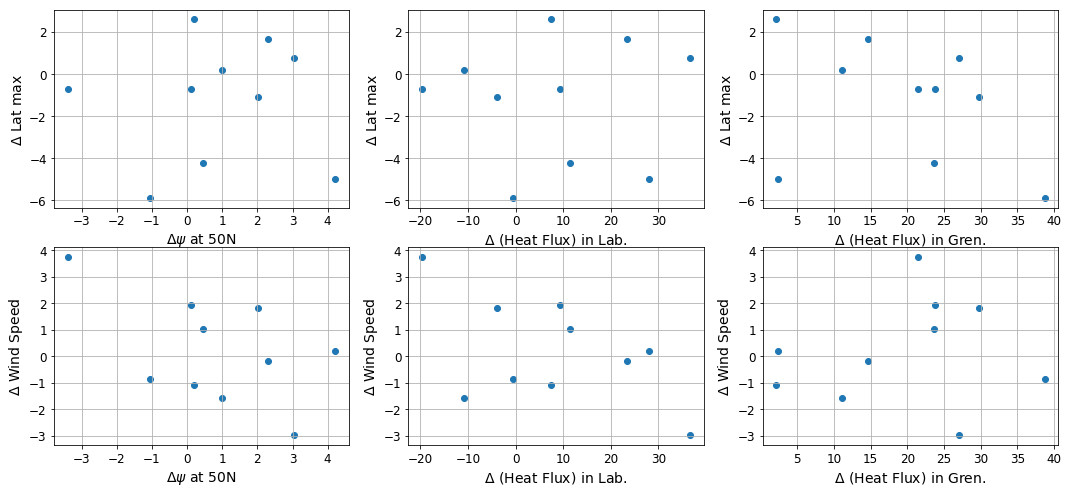

In [112]:
umax_clim = (u_max.mean('r')).groupby('time.season').mean('time')
lat_max_clim = (lat_umax.mean('r')).groupby('time.season').mean('time')

umax_resam = u_max.resample(time='QS-DEC').mean('time')
umax_anom = umax_resam.groupby("time.season") - umax_clim
umax_anom = umax_anom.sel(time = umax_anom['time.season'] == 'DJF')

lat_max_resam = lat_umax.resample(time='QS-DEC').mean('time')
lat_max_anom = lat_max_resam.groupby("time.season") - lat_max_clim
lat_max_anom = lat_max_anom.sel(time = lat_max_anom['time.season'] == 'DJF')

d_psi = psi_anom_mean.isel(y=2, time_counter=10) - psi_anom_mean.isel(y=2, time_counter=0)
d_lat = lat_max_anom.isel(time = 10) - lat_max_anom.isel(time=0) 
d_wind = umax_anom.isel(time = 10) - umax_anom.isel(time=0) 

grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,8])

ax = fig.add_subplot(grid[0, 0])
ax.scatter(d_psi, d_lat)
ax.set_ylabel(r'$\Delta$ Lat max', fontsize=14)
ax.set_xlabel(r'$\Delta\psi$ at 50N', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 0])
ax.scatter(d_psi, d_wind)
ax.set_ylabel(r'$\Delta$ Wind Speed', fontsize=14)
ax.set_xlabel(r'$\Delta\psi$ at 50N', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[0, 1])
ax.scatter(d_hfds_lab, d_lat)
ax.set_ylabel(r'$\Delta$ Lat max', fontsize=14)
ax.set_xlabel(r'$\Delta$ (Heat Flux) in Lab.', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 1])
ax.scatter(d_hfds_lab, d_wind)
ax.set_xlabel(r'$\Delta$ (Heat Flux) in Lab.', fontsize=14)
ax.set_ylabel(r'$\Delta$ Wind Speed', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[0, 2])
ax.scatter(d_hfds_gren, d_lat)
ax.set_ylabel(r'$\Delta$ Lat max', fontsize=14)
ax.set_xlabel(r'$\Delta$ (Heat Flux) in Gren.', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 2])
ax.scatter(d_hfds_gren, d_wind)
ax.set_xlabel(r'$\Delta$ (Heat Flux) in Gren.', fontsize=14)
ax.set_ylabel(r'$\Delta$ Wind Speed', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

#### NAO index calculation

EOF based approach

See https://climatedataguide.ucar.edu/climate-data/hurrell-north-atlantic-oscillation-nao-index-station-based

See https://ajdawson.github.io/eofs/latest/examples/nao_xarray.html

Station-based approach

SLP anomaly (normalized) between Azores ($35^{\circ}N-40^{\circ}N$, $30^{\circ}W-25^{\circ}W$) and Iceland ($60^{\circ}N-65^{\circ}N$, $18^{\circ}W-13^{\circ}W$) regions. 

In [48]:
from eofs.xarray import Eof

psl_clim = (ds['psl'].mean('r')).groupby('time.season').mean('time')

psl_resam = ds['psl'].resample(time='QS-DEC').mean('time')
psl_anom = psl_resam.groupby("time.season") - psl_clim
#psl_anom = psl_anom.sel(time = psl_anom['time.season'] == 'DJF')
psl_anom = psl_anom.sel(lat = slice(20., 80.), lon = slice(270., 360.)) 

#psl_clim = (ds['psl'].mean('r')).groupby('time.month').mean('time')
#psl_resam = ds['psl'].resample(time='MS').mean('time')
#psl_anom = psl_resam.groupby("time.month") - psl_clim
#psl_anom = psl_anom.sel(time = psl_anom['time.season'] == 'DJF')
#psl_anom = psl_anom.sel(lat = slice(20., 80.), lon = slice(270., 360.)) 

#print(psl_anom)

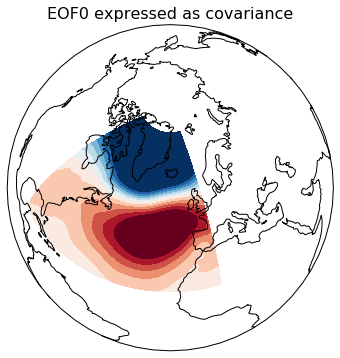

0


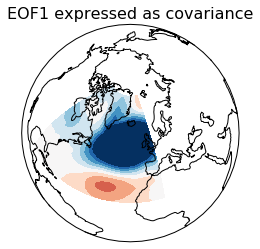

1


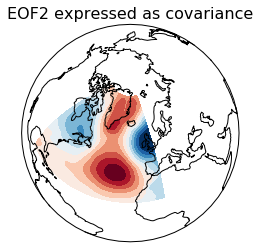

2


In [50]:
coslat = np.cos(np.deg2rad(psl_anom.coords['lat'].values)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(psl_anom.isel(r=0), weights=wgts)

eofs = solver.eofsAsCovariance(neofs=10)

grid = plt.GridSpec(1, 4, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[22,6])

for i in range(0,3):

    clevs = np.linspace(-150, 150, 11)
    proj = ccrs.Orthographic(central_longitude=-20, central_latitude=60)
    ax = fig.add_subplot(grid[0, i], projection=proj)
    ax = plt.axes(projection=proj)
    ax.coastlines()
    ax.set_global()
    eofs.isel(mode=i).plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             transform=ccrs.PlateCarree(), add_colorbar=False)
    ax.set_title('EOF' + str(i) + ' expressed as covariance', fontsize=16)
    plt.show()
    
    print(i)

#print(wgts.shape)

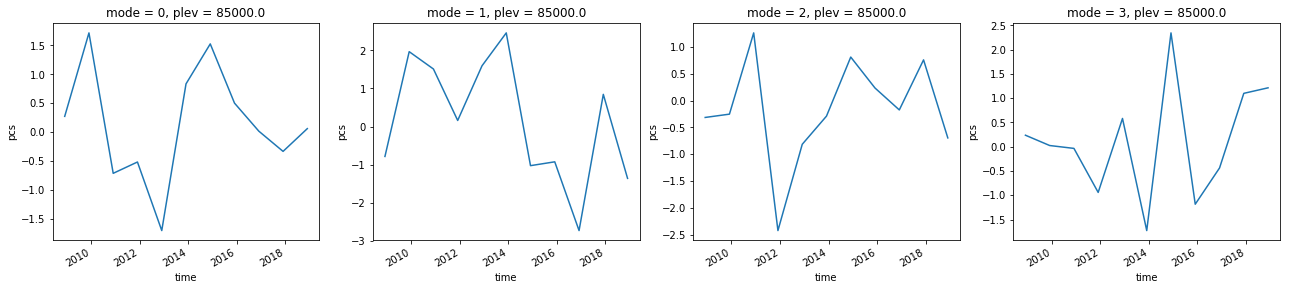

In [53]:
pcs = solver.pcs(npcs=10, pcscaling=1)

fig = plt.figure(figsize=[22,4])

for i in range(0,4):
    
    plt.subplot(1,4,i+1)
    pcs.sel(time = psl_anom['time.season'] == 'DJF').isel(mode=i).plot()
    #pcs.isel(mode=i).plot()

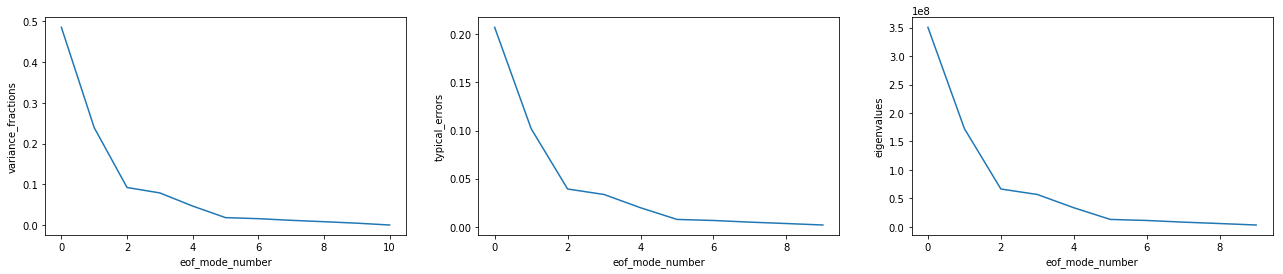

In [94]:
variance_fraction = solver.varianceFraction()

eigenvalues = solver.eigenvalues(neigs = 10)

errors = solver.northTest(neigs=10, vfscaled=True)

fig = plt.figure(figsize=[22,4])

plt.subplot(1,3,1)
variance_fraction.plot()

plt.subplot(1,3,2)
errors.plot()

plt.subplot(1,3,3)
eigenvalues.plot()

In [96]:
# NAO indices using SLP differences between azores and icealand boxes

psl_clim = (ds['psl'].mean('r')).groupby('time.season').mean('time')

psl_resam = ds['psl'].resample(time='QS-DEC').mean('time')
psl_anom = psl_resam.groupby("time.season") - psl_clim
psl_anom = psl_anom.sel(time = psl_anom['time.season'] == 'DJF')

dA = ds['dx'] * ds['dy']
dA, tmp = xr.broadcast(dA, ds['psl'].isel(r=0, time=0))

P_south = ((psl_anom * dA).sel(lat = slice(35., 40.), lon = slice(330., 335.))).sum(['lat','lon']) / dA.sum()

P_north = ((psl_anom * dA).sel(lat = slice(60., 65.), lon = slice(342., 347.))).sum(['lat','lon']) / dA.sum()

NAO = (P_south - P_south.mean('time')) / P_south.std('time') - (P_north - P_north.mean('time')) / P_north.std('time')

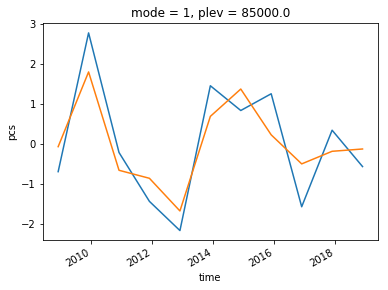

In [99]:
NAO.isel(r=0).plot()
pcs.sel(time = psl_anom['time.season'] == 'DJF').isel(mode=1).plot()

<xarray.DataArray (lat: 144, lon: 120)>
array([[5.752938e+09, 5.752938e+09, 5.752938e+09, ..., 5.752938e+09,
        5.752938e+09, 5.752938e+09],
       [5.752397e+09, 5.752397e+09, 5.752397e+09, ..., 5.752397e+09,
        5.752397e+09, 5.752397e+09],
       [5.751316e+09, 5.751316e+09, 5.751316e+09, ..., 5.751316e+09,
        5.751316e+09, 5.751316e+09],
       ...,
       [1.136029e+09, 1.136029e+09, 1.136029e+09, ..., 1.136029e+09,
        1.136029e+09, 1.136029e+09],
       [1.081292e+09, 1.081292e+09, 1.081292e+09, ..., 1.081292e+09,
        1.081292e+09, 1.081292e+09],
       [1.026453e+09, 1.026453e+09, 1.026453e+09, ..., 1.026453e+09,
        1.026453e+09, 1.026453e+09]])
Coordinates:
  * lat      (lat) float64 0.2778 0.8333 1.389 1.944 ... 78.06 78.61 79.17 79.72
    plev     float64 8.5e+04
  * lon      (lon) float64 260.4 261.2 262.1 262.9 ... 357.1 357.9 358.7 359.6


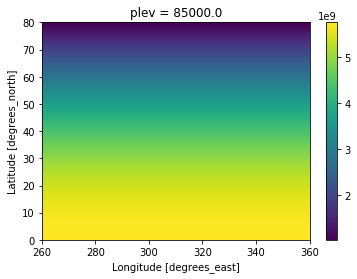

In [65]:
dA = ds['dx'] * ds['dy']
dA, tmp = xr.broadcast(dA, ds['psl'].isel(r=0, time=0))

print(dA)

dA.plot()

### Compute Seasonal Mean and Anomalies (Focus on DJF)

In [47]:
# compute climatology

lat_lim = [50.0, 60.0]; lon_lim = [-100.0, 50.0]
psi_anom_mean = psi_anom.sel(y = slice(lat_lim[0], lat_lim[1])).mean('y')


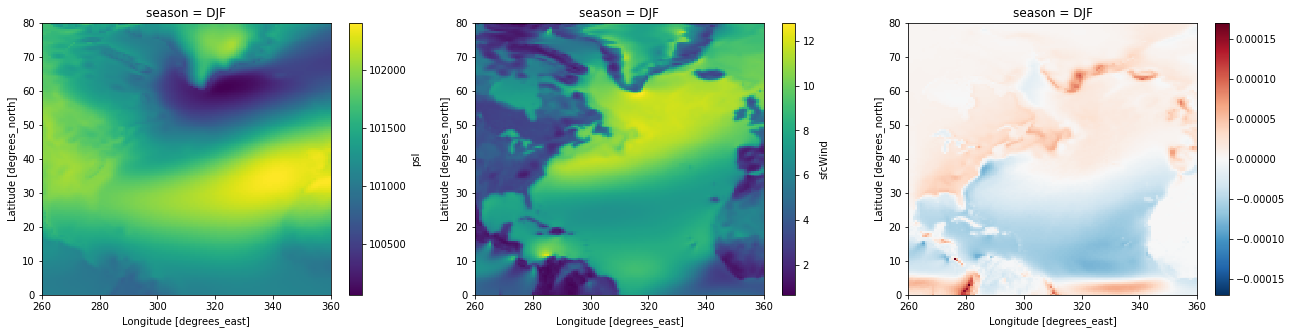

In [60]:
fig = plt.figure(figsize=[22,5])

plt.subplot(1,3,1)
psl_clim.sel(season='DJF').plot()

plt.subplot(1,3,2)
sfcwind_clim.sel(season='DJF').plot()

plt.subplot(1,3,3)
pr_evap_clim.sel(season='DJF').plot()

In [52]:
ds.lat

<xarray.DataArray 'lat' (lat: 144)>
array([ 0.277786,  0.833336,  1.388893,  1.94445 ,  2.500008,  3.055557,
        3.611115,  4.166672,  4.722229,  5.277786,  5.833336,  6.388893,
        6.94445 ,  7.500008,  8.055565,  8.611115,  9.166672,  9.722229,
       10.277786, 10.833336, 11.388893, 11.94445 , 12.500008, 13.055565,
       13.611115, 14.166672, 14.722229, 15.277786, 15.833336, 16.388893,
       16.94445 , 17.500008, 18.055565, 18.611115, 19.166672, 19.722229,
       20.277786, 20.833336, 21.388893, 21.94445 , 22.500008, 23.055565,
       23.611115, 24.166672, 24.722229, 25.277786, 25.833336, 26.388893,
       26.94445 , 27.500008, 28.055565, 28.611115, 29.166672, 29.722229,
       30.277786, 30.833344, 31.388893, 31.94445 , 32.500008, 33.055565,
       33.611115, 34.166672, 34.722229, 35.277786, 35.833344, 36.388893,
       36.94445 , 37.500008, 38.055565, 38.611122, 39.166679, 39.722237,
       40.277779, 40.833336, 41.388893, 41.94445 , 42.500008, 43.055565,
       43.61112

In [53]:
ds.lon

<xarray.DataArray 'lon' (lon: 120)>
array([260.416656, 261.249969, 262.083313, 262.916656, 263.749969, 264.583313,
       265.416656, 266.249969, 267.083313, 267.916656, 268.749969, 269.583313,
       270.416656, 271.249969, 272.083313, 272.916656, 273.749969, 274.583313,
       275.416656, 276.249969, 277.083313, 277.916656, 278.749969, 279.583313,
       280.416656, 281.249969, 282.083313, 282.916656, 283.749969, 284.583313,
       285.416656, 286.249969, 287.083313, 287.916656, 288.749969, 289.583313,
       290.416656, 291.249969, 292.083313, 292.916656, 293.749969, 294.583313,
       295.416656, 296.249969, 297.083313, 297.916656, 298.749969, 299.583313,
       300.416656, 301.249969, 302.083313, 302.916656, 303.749969, 304.583313,
       305.416656, 306.249969, 307.083313, 307.916656, 308.749969, 309.583313,
       310.416656, 311.249969, 312.083313, 312.916656, 313.749969, 314.583313,
       315.416656, 316.249969, 317.083313, 317.916656, 318.749969, 319.583313,
       320.41665

In [54]:
d = xr.open_dataset(ppdir + str(year) + "_ua.nc")

print(d.lat, d.lon)

<xarray.DataArray 'lat' (lat: 144)>
array([7.629395e-06, 5.555573e-01, 1.111115e+00, 1.666672e+00, 2.222229e+00,
       2.777779e+00, 3.333336e+00, 3.888893e+00, 4.444450e+00, 5.000008e+00,
       5.555557e+00, 6.111115e+00, 6.666672e+00, 7.222229e+00, 7.777786e+00,
       8.333336e+00, 8.888893e+00, 9.444450e+00, 1.000001e+01, 1.055556e+01,
       1.111111e+01, 1.166667e+01, 1.222223e+01, 1.277779e+01, 1.333334e+01,
       1.388889e+01, 1.444445e+01, 1.500001e+01, 1.555556e+01, 1.611111e+01,
       1.666667e+01, 1.722223e+01, 1.777779e+01, 1.833334e+01, 1.888889e+01,
       1.944445e+01, 2.000001e+01, 2.055556e+01, 2.111111e+01, 2.166667e+01,
       2.222223e+01, 2.277779e+01, 2.333334e+01, 2.388889e+01, 2.444445e+01,
       2.500001e+01, 2.555556e+01, 2.611111e+01, 2.666667e+01, 2.722223e+01,
       2.777779e+01, 2.833334e+01, 2.888889e+01, 2.944445e+01, 3.000001e+01,
       3.055556e+01, 3.111111e+01, 3.166667e+01, 3.222223e+01, 3.277779e+01,
       3.333334e+01, 3.388889e+01, 3.444

In [55]:
d1 = xr.open_dataset(ppdir + str(year) + "_va.nc")

print(d1.lat, d1.lon)

<xarray.DataArray 'lat' (lat: 144)>
array([7.629395e-06, 5.555573e-01, 1.111115e+00, 1.666672e+00, 2.222229e+00,
       2.777779e+00, 3.333336e+00, 3.888893e+00, 4.444450e+00, 5.000008e+00,
       5.555557e+00, 6.111115e+00, 6.666672e+00, 7.222229e+00, 7.777786e+00,
       8.333336e+00, 8.888893e+00, 9.444450e+00, 1.000001e+01, 1.055556e+01,
       1.111111e+01, 1.166667e+01, 1.222223e+01, 1.277779e+01, 1.333334e+01,
       1.388889e+01, 1.444445e+01, 1.500001e+01, 1.555556e+01, 1.611111e+01,
       1.666667e+01, 1.722223e+01, 1.777779e+01, 1.833334e+01, 1.888889e+01,
       1.944445e+01, 2.000001e+01, 2.055556e+01, 2.111111e+01, 2.166667e+01,
       2.222223e+01, 2.277779e+01, 2.333334e+01, 2.388889e+01, 2.444445e+01,
       2.500001e+01, 2.555556e+01, 2.611111e+01, 2.666667e+01, 2.722223e+01,
       2.777779e+01, 2.833334e+01, 2.888889e+01, 2.944445e+01, 3.000001e+01,
       3.055556e+01, 3.111111e+01, 3.166667e+01, 3.222223e+01, 3.277779e+01,
       3.333334e+01, 3.388889e+01, 3.444

In [62]:
!python --version

Python 3.7.1
